<a href="https://colab.research.google.com/github/NguyenMinhHieu-20130261/20130261_NguyenMinhHieu_ML2023/blob/main/GK_ML_20130261_20130262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Đồ án Máy Học**

## **Thành viên:**
* *Nguyễn Minh Hiếu - 20130261*

* *Nguyễn Trung Hiếu - 20130262*

# **1.Giới thiệu**
* Pokemon là một dòng trò chơi điện tử được phát triển bởi Game Freak, Creatures Inc. được phát hành bởi Nintendo như là một phần của thương hiệu Pokemon. Pokemon được ra mắt lần đầu tiên tại Nhật Bản vào năm 1996 cho các hệ máy GameBoy, các trò chơi nhập vai (RPG) chính thống và vẫn được tiếp tục phát hành trên các hệ máy cầm tay tiếp theo của Nintendo. Trò chơi thường được phát hành theo cặp, mỗi phiên bản có một sự khác biệt nhỏ so với bản kia, và thường các tựa game tái phát hành sẽ được ra mắt vài năm sau. Ngoài các tựa game chính thống thuộc thể loại nhập vai, còn có một số tựa game phụ khác thuộc thể loại nhập vai hành động, giải đố, nuôi thú ảo.Tính đến tháng 2 năm 2016, có hơn 279 triệu bản được bán ra trên toàn thế giới, hơn 200 triệu là các tựa game chính thống, khiến Pokemon trở thành tựa game bán chạy thứ hai toàn cầu chỉ đứng sau thương hiệu Mario của Nintendo. Linh vật chính của Pokemon là Pikachu.
## 1.1 Giới hạn
* Dataset "Pokemon All Generations" được lấy từ Kaggle và  là một bộ dữ liệu thuộc lĩnh vực trò chơi điện tử (video game).
* Bộ dữ liệu này được tổng hợp từ nhiều nguồn và cung cấp thông tin về hơn 800 loài Pokemon, từ các thế hệ khác nhau cho đến các thuộc tính về mỗi loài pokemon.
## 1.2 **Mô tả dữ liệu các thuộc tính**
* Bộ dữ liệu này gồm 890 mẫu và mỗi mẫu có 12 thuộc tính. Các thuộc tính này bao gồm:
1. Name: Tên của từng Pokemon
2. Pokedex id: Số thứ tự của từng Pokemon
3. Height: Chiều cao của từng Pokemon
4. Weight: Cân nặng của từng Pokemon
5. Type: Loại của từng Pokemon ()
6. Secondary Type: Loại nâng cấp của từng Pokemon
7. HP (Hit point/ Health point): Chỉ số máu của từng Pokemon
8. Attack: Chỉ số tấn công của từng Pokemon
9. Defense: Chỉ số phòng ngự của từng Pokemon
10. SP Atk (Special Attack): Chỉ số tấn công của đòn đặc biệt của từng Pokemon
11. SP Def (Special Defense) : Chỉ số phòng ngự của đòn đặc biệt của từng Pokemon
12. Speed: Chỉ số tốc độ của từng Pokemon (Thứ quyết định coi pokemon nào sẽ hành động trước)
##1.3 Mục tiêu
* Bộ dữ liệu này có mục tiêu là để phân tích các xu hướng và đưa ra dự đoán về các loài Pokemon trong tương lai, cũng như giúp người chơi Pokemon tìm hiểu về các thuộc tính và cách lập chiến thuật của các loài Pokemon qua sức mạnh của nó.

# 2 Xử lí dữ liệu
## 2.1 Kiểm tra dữ liệu



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


Đầu tiên chúng ta sẽ kiểm tra phân bố của dữ liệu, vấn đề của dữ liệu đó.

In [2]:
#import thư viện cần dùng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file csv vào DataFrame
pokemon_dts = pd.read_csv('Pokemon_full.csv')
# Hiển thị thông tin các cột của dataset
pokemon_dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            890 non-null    object
 1   pokedex id      890 non-null    int64 
 2   height          890 non-null    int64 
 3   weight          890 non-null    int64 
 4   type            890 non-null    object
 5   secundary type  890 non-null    object
 6   hp              890 non-null    int64 
 7   attack          890 non-null    int64 
 8   defense         890 non-null    int64 
 9   sp atk          890 non-null    int64 
 10  sp def          890 non-null    int64 
 11  speed           890 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 83.6+ KB


Vì mục đích của chúng ta là đánh giá sức mạnh của các pokemon nên chúng ta sẽ bỏ những cột mà không cần dùng tới (name, pokedex id, height, weight, type, secundary type)

In [3]:
# Bỏ 6 cột không cần dùng tới
pokemon_dts.drop(['name','pokedex id', 'height', 'weight', 'type', 'secundary type'], axis = 1, inplace = True)
#Kiểm tra thống kê mô tả của dts
print(pokemon_dts.describe())

               hp      attack     defense      sp atk      sp def       speed
count  890.000000  890.000000  890.000000  890.000000  890.000000  890.000000
mean    68.702247   76.300000   71.819101   69.548315   69.858427   65.650562
std     25.844566   29.592069   29.543887   29.351989   27.056001   28.060803
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000
25%     50.000000   55.000000   50.000000   45.250000   50.000000   45.000000
50%     65.000000   75.000000   67.000000   65.000000   65.000000   65.000000
75%     80.000000   95.000000   90.000000   90.000000   85.000000   85.000000
max    255.000000  181.000000  230.000000  173.000000  230.000000  160.000000


Để đánh giá được sức mạnh của các pokemon thì chúng ta cần biết được lực chiến của pokemon đó. 

Để làm được như thế thì chúng ta sẽ tính toán lực chiến dựa vào các thuộc tính đã có (hp, attack, defense, sp atk, sp def, speed).

Công thức tính lực chiến: total = hp + attack + defense + sp atk + sp def


In [4]:
# Thêm cột total và rating để thể hiện tổng lực chiến của pokemon với mục đích đánh giá sức mạnh của pokemon
total= []
for i in range(len(pokemon_dts)):
    total.append(pokemon_dts.iloc[i,0] + pokemon_dts.iloc[i,1]+ pokemon_dts.
iloc[i,2]+ pokemon_dts.iloc[i,3]+ pokemon_dts.iloc[i,4] +pokemon_dts.iloc[i,5])
pokemon_dts['total'] = total
# Thêm cột rating để đánh giá sức mạnh của pokemon
pokemon_dts['rating'] = pd.cut(pokemon_dts['total'], bins = (0,int(np.mean(total)), max(total)), labels = ['Weak', 'Strong'])
pokemon_dts.head()    

,hp,attack,defense,sp atk,sp def,speed,total,rating
0,45,49,49,65,65,45,318,Weak
1,60,62,63,80,80,60,405,Weak
2,80,82,83,100,100,80,525,Strong
3,39,52,43,60,50,65,309,Weak
4,58,64,58,80,65,80,405,Weak


* Sau khi đánh giá được sức mạnh của pokemon thì chúng ta tính giá trị trung bình của rating với mục đích chuyển đổi thuộc tính của cột rating từ kiểu dữ liệu chuỗi (string) sang dạng số nguyên.
* Việc này giúp cho việc phân tích và mô hình hóa dữ liệu dễ dàng hơn, vì các giải thuật phân tích dữ liệu thường chỉ hoạt động được trên dữ liệu số.

In [5]:
np.mean(total)
print(np.mean(total))
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
pokemon_dts['rating'] = le.fit_transform(pokemon_dts['rating'])
pokemon_dts.head()    
pokemon_dts['rating'].value_counts()

421.87865168539327


0    467
1    423
Name: rating, dtype: int64

In [6]:
# Kiểm tra biến phân lớp
pokemon_dts['total'].value_counts()

600    33
500    28
405    26
490    24
300    22
       ..
497     1
215     1
358     1
264     1
690     1
Name: total, Length: 194, dtype: int64

##2.2 Thăm dò dữ liệu

In [7]:
# Lấy ra danh sách tên các đặc trưng định tính
numerical = pokemon_dts.drop(columns='rating').select_dtypes(include=np.number).columns.tolist()

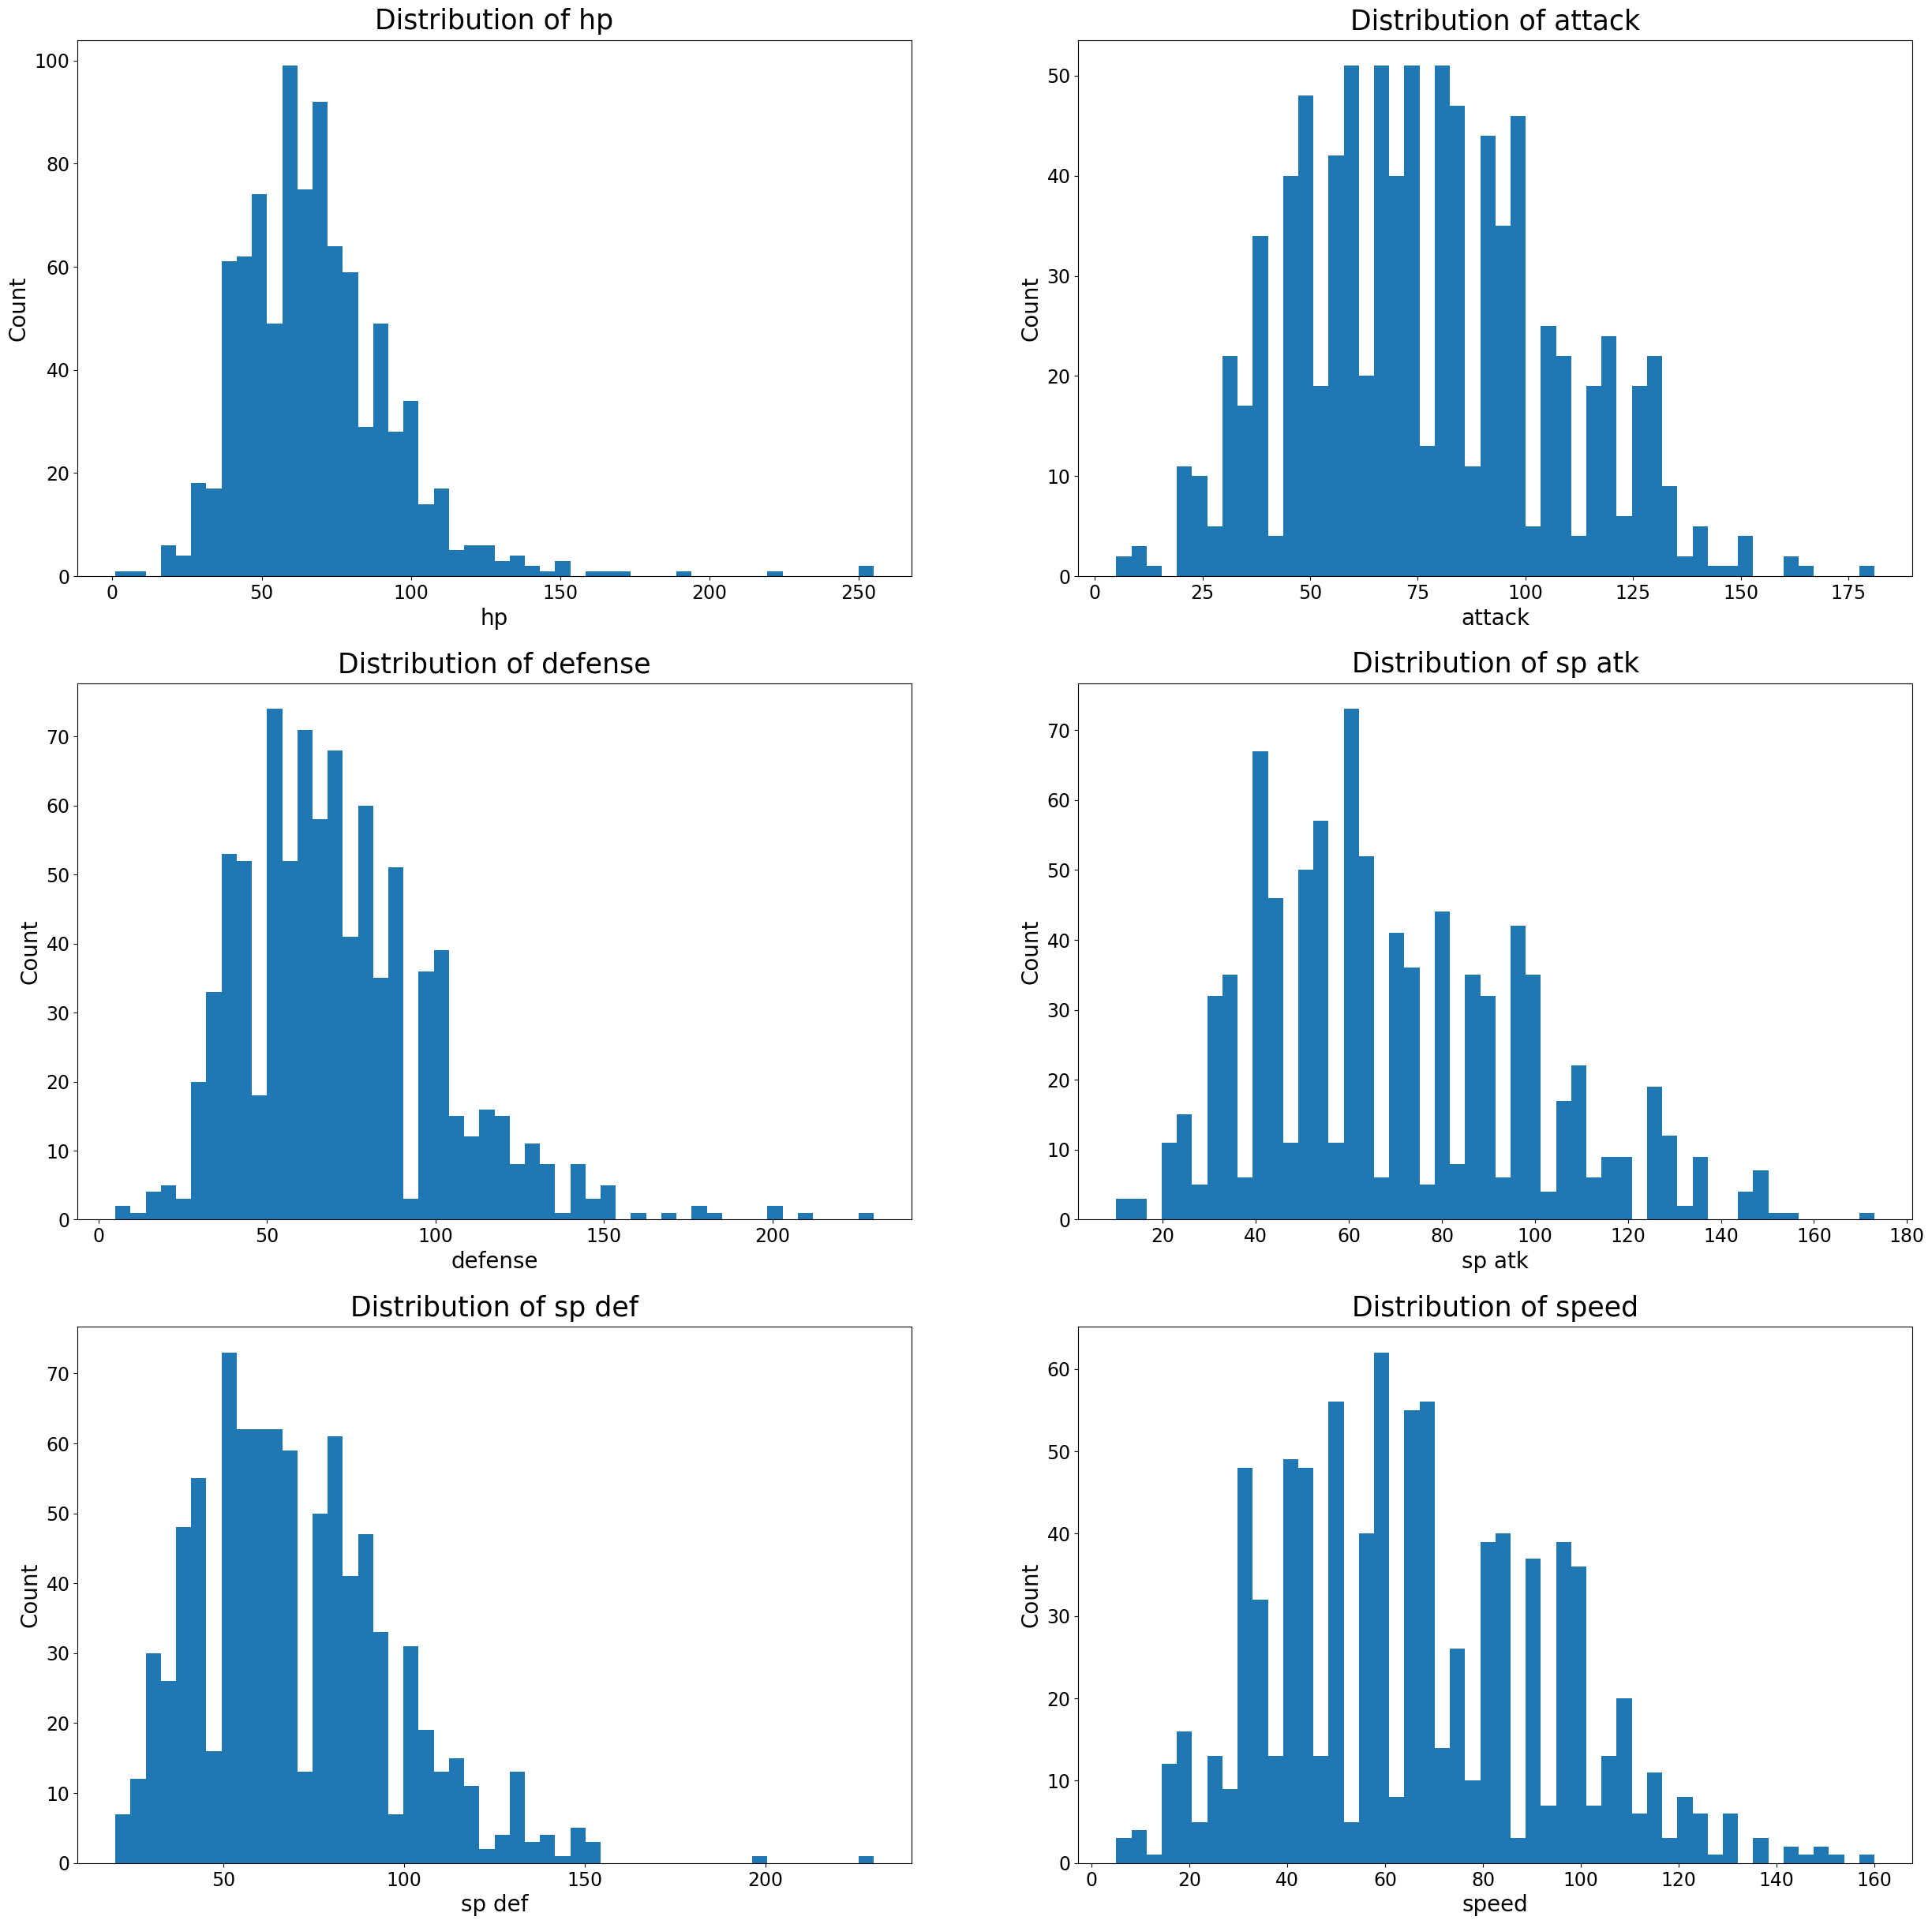

In [8]:
# Biểu đồ histogram của 6 đặc trưng định lượng
fig, axs = plt.subplots(3, 2, figsize=(30,30))
for ax, col in zip(axs.flat, numerical):
  ax.hist(pokemon_dts[col], bins=50)
  ax.set_xlabel(col,fontsize = 20) 
  ax.set_ylabel("Count", fontsize = 20)
  ax.set_title(f"Distribution of {col}", fontsize=25, pad=10)
  ax.tick_params(axis='both', labelsize=17) 

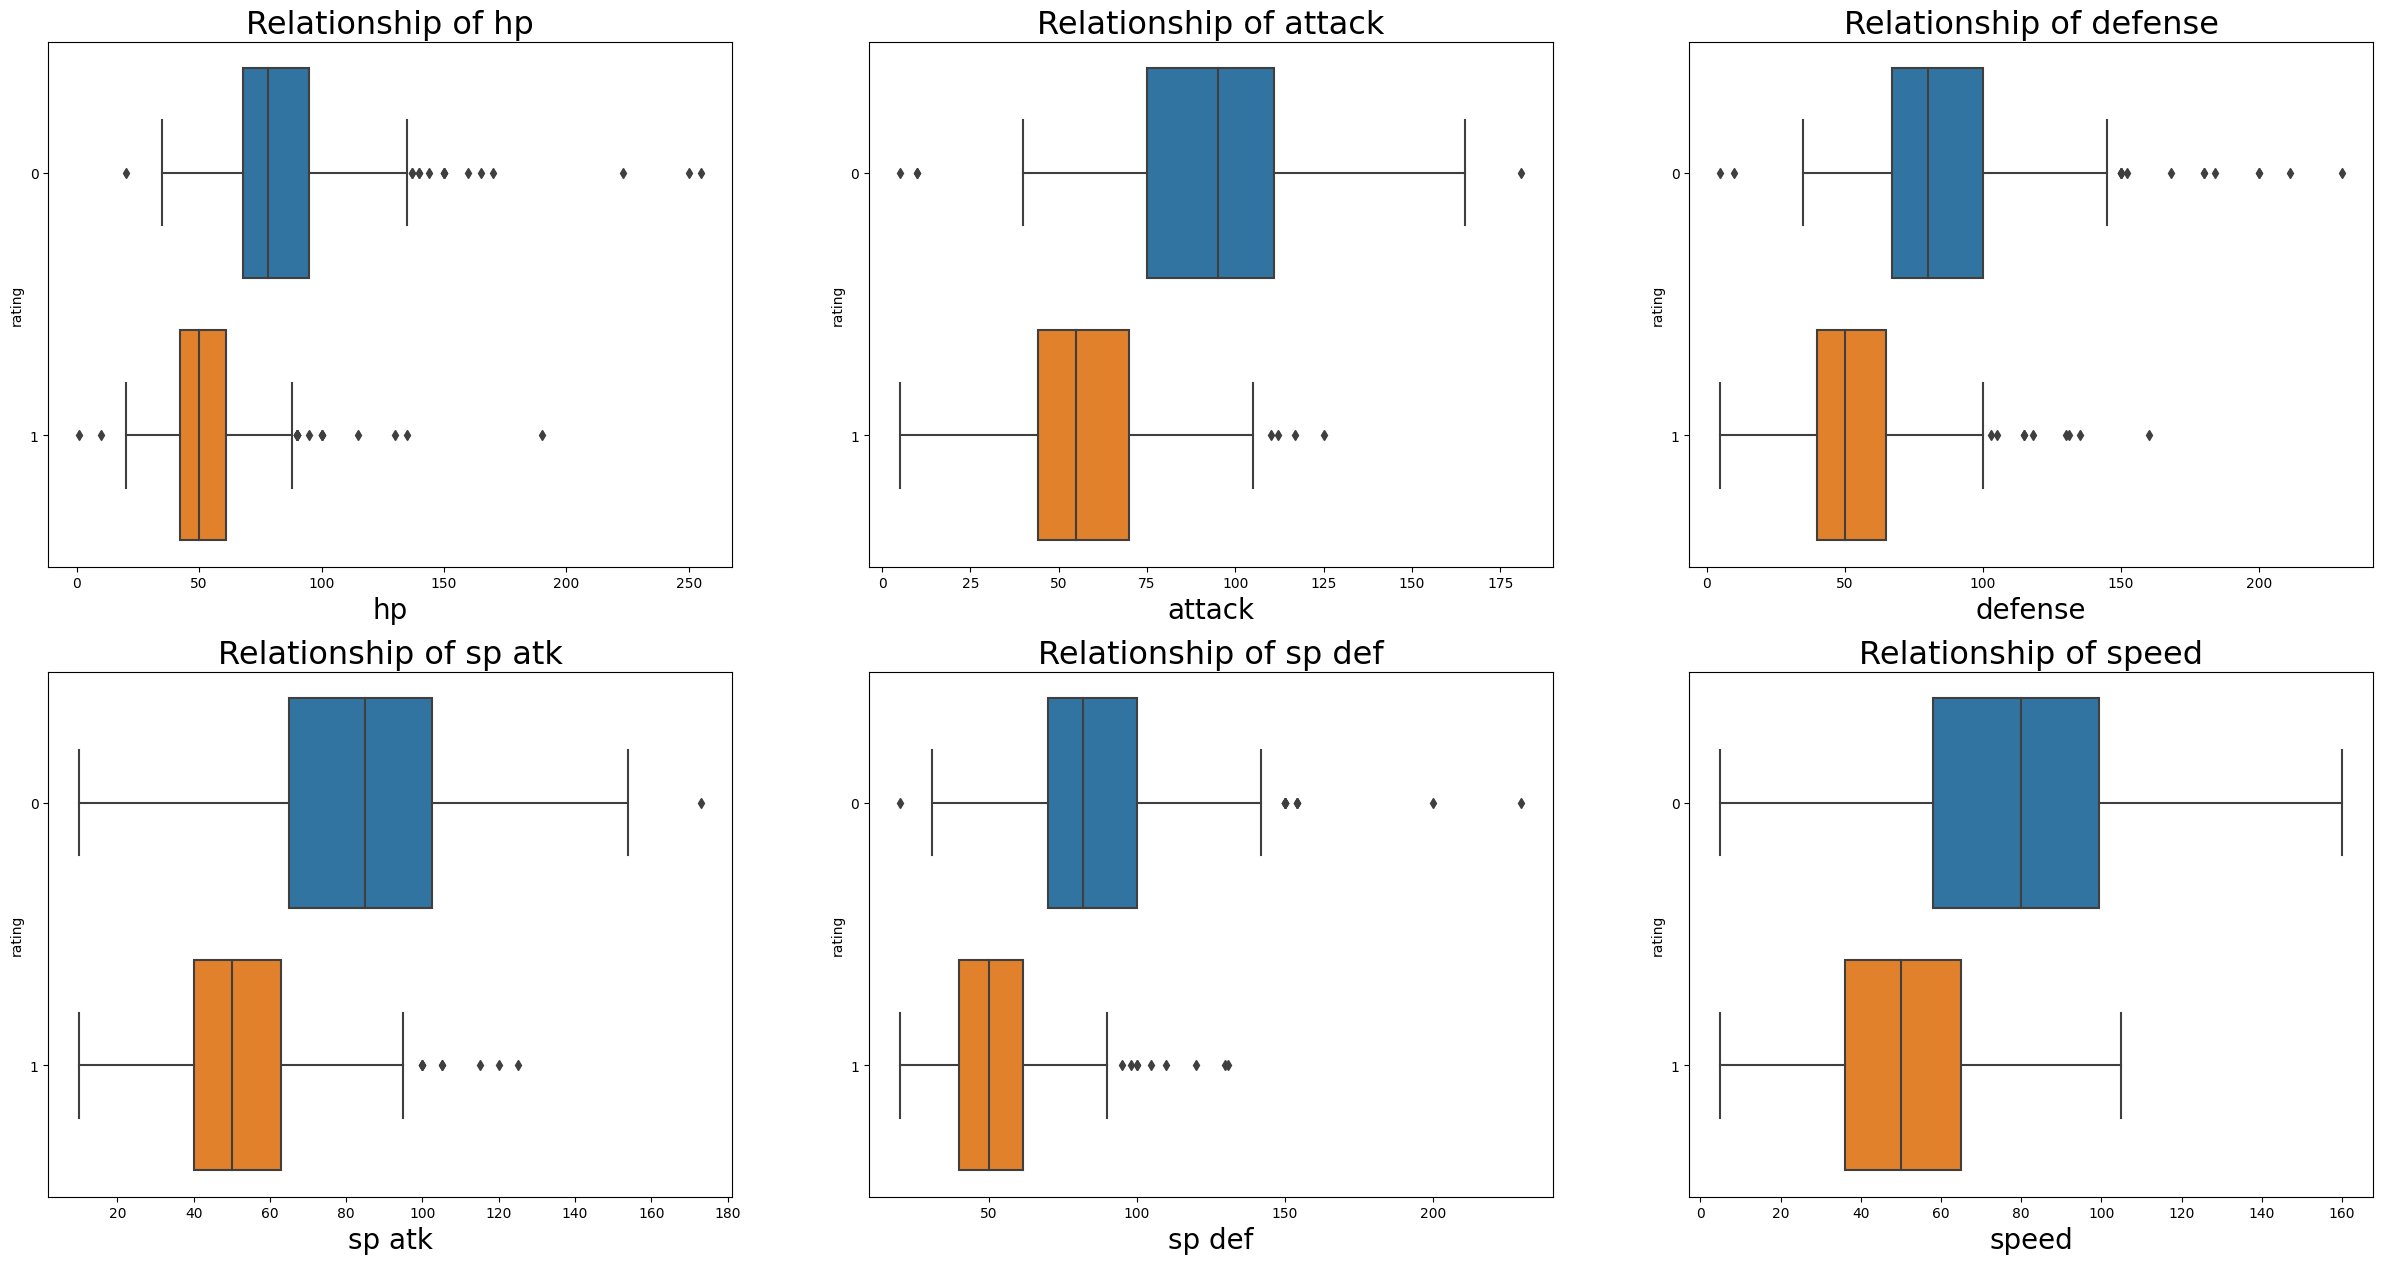

In [9]:
# Lặp qua các thuộc tính, vẽ biểu đồ hộp của 6 đặc trưng định lượng, thể hiện quan hệ giữa chúng với biến phân lớp
fig, axs = plt.subplots(2, 3, figsize=(30,15))
for ax, col in zip(axs.flat, numerical):
  sns.boxplot(ax=ax, x=col, y="rating", data=pokemon_dts, orient='h')
  ax.set_xlabel(col,fontsize = 20) 
  ax.set_title(f"Relationship of {col}", fontsize=23)

* Đối với đặc trưng định lượng (numerical features) của dataset, ta thấy phân bố dữ liệu khá đa dạng và không đồng đều, trong đó các cột có phân bố không đồng đều và nhiều giá trị outlier, đặc biệt trong đó có những cột có dữ liệu không đồng đều với 1 số đặc trưng có dữ liệu rất ít và 1 đặc trưng trong đó có dữ liệu rất nhiều.
####**==> Vì thế để tăng cường khả năng phân loại của thuật toán thì chúng ta sẽ tiến đến quá trình tiền xử lí dữ liệu (xóa bớt dữ liệu dư thừa, xử lí dữ liệu bị thiếu, xử lí dữ liệu outlier,làm sạch dữ liệu và cân bằng dữ liệu)**

#3. Tiền xử lí dữ liệu

##3.1 Sơ chế dữ liệu (Data Wrangling)
* Data Wrangling là quá trình chuyển đổi dữ liệu từ dạng thô sang dạng sẵn sàng để phân tích. Sơ chế dữ liệu là một bước quan trọng trong tiền xử lý dữ liệu để giúp cho việc xử lí dữ liệu và cải thiện độ chính xác của mô hình máy học.
Sơ chế dữ liệu bao gồm các công việc của Làm sạch dữ liệu (Data Cleaning) và Chuyển đổi dữ liệu (Data Transformation).


Đầu tiên chúng ta kiểm tra dataset có giá trị nào để trống không (giá trị NULL) và kiểm tra các hàng trùng lặp
Nếu có trùng lặp thì tiến hành xóa

In [10]:
# Import những thư viện cần thiết
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Kiểm tra coi dataset có giá trị nào NULL không
print(pokemon_dts.isnull().sum())

#Kiểm tra các hàng trùng lặp
print(pokemon_dts.duplicated().sum())

#Kết quả ra 17 hàng trùng lặp
# Xóa các hàng trùng lặp (có 17 hàng)
pokemon_dts.drop_duplicates(inplace=True)

hp         0
attack     0
defense    0
sp atk     0
sp def     0
speed      0
total      0
rating     0
dtype: int64
17


##3.2. Trích chọn đặc trưng
Ta sẽ sử dụng phương pháp mang tên Mutual Information, triển khai thông qua hàm mutual_info_classif của sklearn. Nguyên nhân lựa chọn là do phương pháp này áp dụng tốt đối với cả biến đầu vào định lượng và định tính.

In [11]:
pokemon_dts.info()
pokemon_dts['rating'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 889
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   hp       873 non-null    int64
 1   attack   873 non-null    int64
 2   defense  873 non-null    int64
 3   sp atk   873 non-null    int64
 4   sp def   873 non-null    int64
 5   speed    873 non-null    int64
 6   total    873 non-null    int64
 7   rating   873 non-null    int64
dtypes: int64(8)
memory usage: 61.4 KB


0    455
1    418
Name: rating, dtype: int64

In [15]:
# Tạo các transformer cho các cột dữ liệu số và phân loại
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Kết hợp các transformer
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, numerical)])

# Tạo pipeline để kết hợp các bước chuyển đổi và trích chọn đặc trưng
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
     ('selector', SelectKBest(mutual_info_classif, k=7))])

# Áp dụng pipeline cho tập dữ liệuS
X = pokemon_dts.drop(['rating'], axis=1)
y = pokemon_dts['rating']

X_selected = pipe.fit_transform(X, y)
print(X_selected)

[[-0.90935584 -0.91541826 -0.76624419 ... -0.17390844 -0.72403186
  -0.92728995]
 [-0.32870367 -0.47589201 -0.29388282 ...  0.38032154 -0.18612211
  -0.13920711]
 [ 0.44549923  0.20030221  0.38091914 ...  1.11929485  0.53109088
   0.9478037 ]
 ...
 [ 0.75518038  1.48507122  0.11099835 ...  0.19557822  2.75445115
   1.62718545]
 [ 0.91002096  1.82316833  1.46060227 ...  1.67352483  2.61100856
   2.26127509]
 [ 2.7681079   0.30173134  0.78580031 ...  0.93455152  2.32412336
   2.44244355]]


<ipython-input-16-7bfec8246ee1>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_num = df[num_columns].values.astype(np.float)


>Threshold=0.00, Features=7
>Threshold=0.05, Features=7
>Threshold=0.10, Features=7
>Threshold=0.15, Features=7
>Threshold=0.20, Features=7
>Threshold=0.25, Features=7
>Threshold=0.30, Features=7
>Threshold=0.35, Features=7
>Threshold=0.40, Features=7
>Threshold=0.45, Features=7


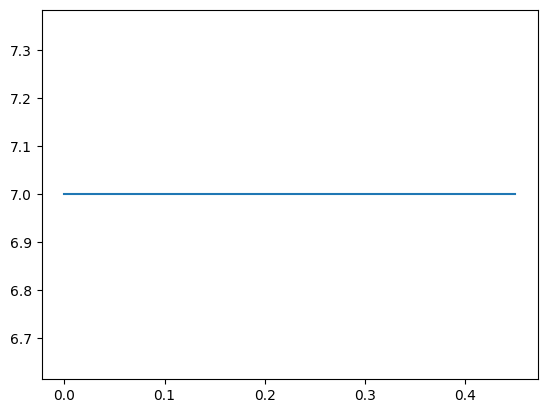

In [16]:
df = pd.read_csv('Pokemon_full.csv')

# Chuyển đổi các biến định lượng
num_columns = ['hp', 'attack', 'defense','sp atk', 'sp def', 'speed']
X_num = df[num_columns].values.astype(np.float)

from sklearn.feature_selection import VarianceThreshold

thresholds = np.arange(0.0, 0.5, 0.05)
# apply transform with each threshold
results = list()

for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
    
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

###Sau khi đã xử lí dữ liệu thì chúng ta sẽ tiến hành xây dựng các mô hình máy học để dự đoán sức mạnh pokemon được đưa vào mẫu dữ liệu.
#4. Xây dựng mô hình và đánh giá kết quả
Sau khi đã xử lý dữ liệu, bước tiếp theo ta sẽ tiến hành xây dựng các mô hình máy học để dự đoán lực chiến của pokemon dựa trên các mẫu dữ liệu.

Các thuật toán sẽ sử dụng để xây dựng mô hình:

1. SVM (Support Vector Machines)
2. kNN (Thuật Toán K-Nearest Neighbors)
3. Naïve Bayes (GaussianNB)
4. RandomForest
5. Decision Tree
6. Neural Network (Fully connected neural network)


Đầu tiên chúng ta xây dựng hàm tổng quát nhận vào thuật toán phân lớp để sử dụng cho các thuật toán khác nhau.

In [18]:
from matplotlib import axis
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Phân chia dữ liệu, bảo tồn tỷ lệ phân lớp (stratify=y).
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

def build_and_eval_model(model):
  
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('1. Cross Validation with train set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = model.predict(X_test)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred, average='macro')],
                                 'recall': [recall_score(y_test, y_pred, average='macro')],
                                 'f1': [f1_score(y_test, y_pred, average='macro')]})
    print('2. Final Validation with test set')
    print(final_scores.to_string(index=False))

##4.1. SVM
Ta sẽ chọn tham số C bằng cách kiểm tra tương quan giữa tham số C và F1. Lý do tại sao là vì F1 là một độ đo tổng hợp của độ chính xác (precision) và độ phủ (recall), nó cung cấp cho chúng ta một cái nhìn tổng quan về hiệu suất của mô hình.


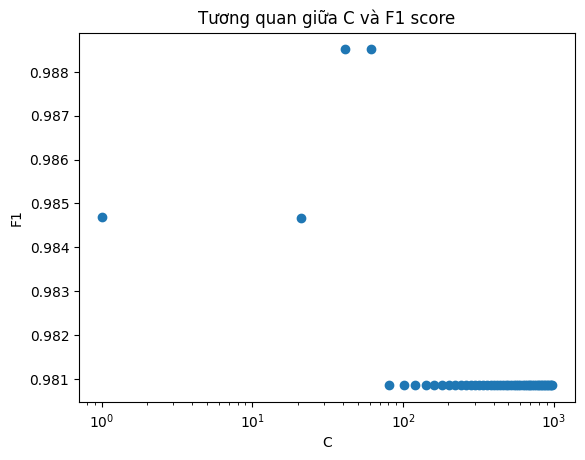

Giá trị C tốt nhất: 41


In [19]:
#Lựa chọn tham số C bằng cách kiểm tra tương quan giữa C và F1
from sklearn import svm

# Ta sẽ kiểm tra trong khoảng từ 1 đến 1000 với bước nhảy mỗi lần là 50
C_range = np.arange(start=1, stop=1000, step=20)

# Lưu giá trị C và F1 score tương ứng
C_list = []
f1_list = []

for C in C_range:
    # Huấn luyện mô hình SVM
    clf = svm.SVC(C=C)
    clf.fit(X_train, y_train)
    # Tính toán F1 score trên tập kiểm tra
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    # Lưu giá trị C và F1 score
    C_list.append(C)
    f1_list.append(f1)

# Vẽ biểu đồ tương quan giữa C và F1 score
plt.plot(C_list, f1_list, 'o', linestyle='')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1')
plt.title('Tương quan giữa C và F1 score')
plt.show()

# Chọn giá trị C tốt nhất
best_C = C_list[np.argmax(f1_list)]
print('Giá trị C tốt nhất:', best_C)

In [20]:
svm_m = svm.SVC(C=41)
build_and_eval_model(svm_m)

1. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.986370              0.986750           0.986251       0.986346
std         0.010082              0.009836           0.010129       0.010104
min         0.967480              0.968501           0.966764       0.967374
25%         0.979508              0.980431           0.979621       0.979487
50%         0.983740              0.984615           0.984127       0.983713
75%         0.991837              0.992248           0.991525       0.991820
max         1.000000              1.000000           1.000000       1.000000
2. Final Validation with test set
 accuracy  precision   recall       f1
  0.98855   0.988312 0.988741 0.988512


##4.2. kNN
Ta sẽ sử dụng **GridSearchCV** để tìm giá trị k tốt nhất

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy')
grid.fit(X_train, y_train)

print("Giá trị k tốt nhất: ", grid.best_params_['n_neighbors'])
print("Giá trị Accuracy cao nhất: ", grid.best_score_)

Giá trị k tốt nhất:  9
Giá trị Accuracy cao nhất:  0.9804301075268815


In [22]:
kNN_m = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
build_and_eval_model(kNN_m)

1. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.978169              0.978215           0.978179       0.978144
std         0.008019              0.008057           0.007977       0.008024
min         0.967213              0.967178           0.967178       0.967178
25%         0.971311              0.971241           0.971415       0.971286
50%         0.983607              0.983589           0.983589       0.983589
75%         0.983673              0.983660           0.983713       0.983658
max         0.991803              0.992188           0.991525       0.991789
2. Final Validation with test set
 accuracy  precision   recall       f1
 0.980916   0.980451 0.981546 0.980869


##4.3. Naïve Bayes (GaussianNB)

In [23]:
from sklearn.naive_bayes import GaussianNB

def build_and_eval_model_nb(model):

    X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_selected, y, test_size=0.3, random_state=0)
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(model, X_train_nb, y_train_nb, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation with train set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    model.fit(X_train_nb, y_train_nb)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = clf.predict(X_test_nb)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test_nb, y_pred)],
                                 'precision': [precision_score(y_test_nb, y_pred, average='macro')],
                                 'recall': [recall_score(y_test_nb, y_pred, average='macro')],
                                 'f1': [f1_score(y_test_nb, y_pred, average='macro')]})
    print('B. Final Validation with test set')
    print(final_scores.to_string(index=False))

In [24]:
nb_m = GaussianNB()
build_and_eval_model_nb(nb_m)

A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.975992              0.977910           0.975141       0.975902
std         0.007876              0.006905           0.008145       0.007930
min         0.959016              0.963235           0.957627       0.958792
25%         0.971445              0.973930           0.970339       0.971317
50%         0.975410              0.977273           0.974576       0.975329
75%         0.983607              0.984615           0.983051       0.983567
max         0.983740              0.984848           0.983051       0.983687
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.980916   0.980657 0.981079 0.980853


##4.4. RandomForest
Đầu tiên ta sẽ thử chọn ra các tham số tốt nhất cho thuật toán bằng **GridSearchCV**

In [25]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rfc = RandomForestClassifier()

rf = GridSearchCV(estimator= rfc, param_grid=param_grid)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

rf_accuracy_score = accuracy_score(y_test, rf_predict)
rf_precision_score = precision_score(y_test, rf_predict, average='macro')
rf_recall_score = recall_score(y_test, rf_predict, average='macro')
rf_f1_score = f1_score(y_test, rf_predict, average='macro')
rf_best_param = rf.best_params_
rf_bestscore = rf.best_score_
print(rf_best_param)
print(rf_bestscore)

{'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 25}
1.0


In [27]:
clf = RandomForestClassifier(max_depth= 3, max_features='sqrt', max_leaf_nodes=3, n_estimators=25)
build_and_eval_model(clf)

1. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.986370              0.987126           0.986350       0.986342
std         0.019478              0.018116           0.019196       0.019512
min         0.934426              0.940299           0.936508       0.934356
25%         0.979575              0.981061           0.978814       0.979508
50%         0.991803              0.992188           0.992063       0.991798
75%         1.000000              1.000000           1.000000       1.000000
max         1.000000              1.000000           1.000000       1.000000
2. Final Validation with test set
 accuracy  precision  recall  f1
      1.0        1.0     1.0 1.0


##4.5. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

dt = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
dt.fit(X_train, y_train)
print(dt.best_params_)
print(dt.best_score_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
1.0


In [29]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
build_and_eval_model(dt)

1. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count           15.0                  15.0               15.0           15.0
mean             1.0                   1.0                1.0            1.0
std              0.0                   0.0                0.0            0.0
min              1.0                   1.0                1.0            1.0
25%              1.0                   1.0                1.0            1.0
50%              1.0                   1.0                1.0            1.0
75%              1.0                   1.0                1.0            1.0
max              1.0                   1.0                1.0            1.0
2. Final Validation with test set
 accuracy  precision  recall  f1
      1.0        1.0     1.0 1.0


##3.6. Neural Network



In [31]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, Normalizer
from tensorflow import keras

# Define the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

y_pred_nn_prob = model.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn_prob, axis=1)

accuracy_nn = accuracy_score(y_test, y_pred_nn)

result = pd.DataFrame({'accuracy': accuracy_nn,           
                       'precision': [precision_score(y_test, y_pred_nn, average='macro')],
                       'recall': [recall_score(y_test, y_pred_nn, average='macro')],
                       'f1': [f1_score(y_test, y_pred_nn, average='macro')]})
# In ra kết quả NW
print('Final Validation with test set:')
print(result)

9/9 [==============================] - 0s 2ms/step
Final Validation with test set:
   accuracy  precision    recall        f1
0   0.98855   0.988095  0.989209  0.988521


#5. Kết luận

Sau khi xây dựng và đánh giá mô hình trên dataset Pokemon All Generations bằng các thuật toán Neural Network, SVM, Random Forest, kNN và Decision Tree, ta có thể so sánh kết quả của các mô hình như sau:

##5.1 Accuracy

- SVM: Accuracy = 0.980916 
- kNN: Accuracy = 0.980916
- Naïve Bayes: Accuracy = 0.980916
- Random Forest: Accuracy = 1.0
- Decision Tree: Accuracy = 1.0
- Neural Network: Accuracy = 0.98855 

Như vậy, các mô hình đều đạt được độ chính xác cao, tuy nhiên, Random Forest và Decision Tree cho kết quả độ chính xác cao nhất (100%), theo sau là Neural Network (98.86%), SVM, kNN, và Naïve Bayes lần lượt có kết quả là (98.09%).

##5.2 Precision

- SVM: Precision = 0.980657 
- kNN: Precision = 0.980657
- Naïve Bayes: Precision = 0.980657
- Random Forest: Precision = 1.0
- Decision Tree: Precision = 1.0
- Neural Network: Precision = 0.988312 

Như vậy, các mô hình đều đạt được chỉ số Precision cao, tuy nhiên, Random Forest và Decision Tree cho kết quả độ chính xác cao nhất (100%), theo sau là Neural Network (98.83%), SVM, kNN, và Naïve Bayes lần lượt có kết quả là (98.07%).

##5.3 Recall

- SVM: Recall = 0.981079 
- kNN: Recall = 0.981079
- Naïve Bayes: Recall = 0.981079
- Random Forest: Recall = 1.0
- Decision Tree: Recall = 1.0
- Neural Network: Recall = 0.988741 

Như vậy, các mô hình đều đạt được chỉ số Recall cao, tuy nhiên, Random Forest và Decision Tree cho kết quả độ chính xác cao nhất (100%), theo sau là Neural Network (98.87%), SVM, kNN, và Naïve Bayes lần lượt có kết quả là (98.11%).

##5.4 F1

- SVM: F1 = 0.980853 
- kNN: F1 = 0.980853
- Naïve Bayes: F1 = 0.980853
- Random Forest: F1 = 1.0
- Decision Tree: F1 = 1.0
- Neural Network: F1 = 0.988512 

Như vậy, các mô hình đều đạt được chỉ số F1 cao, tuy nhiên, Random Forest và Decision Tree cho kết quả độ chính xác cao nhất (100%), theo sau là Neural Network (98.85%), SVM, kNN, và Naïve Bayes lần lượt có kết quả là (98.09%).


#Tổng kết

Với các chỉ số tổng kết trên, xét trên các hệ số thì Random Forest và Decision Tree hoạt động khá tốt, thích hợp để áp dụng vô bài toán này. Đồng thời ta có thể giảm độ nghiêm ngặt xuống để đưa Neutral Network vô nhóm có thể áp dụng này, do nó cũng thể hiện các hệ số bám khá sát với 2 thuật toán nêu trên.